<a href="https://colab.research.google.com/github/shnay03/ML-Final-Project/blob/main/Final_Project_ML_(final)_G5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
url = 'https://github.com/shnay03/ML-Final-Project/blob/main/data.csv/?raw=True'
df = pd.read_csv(url, delimiter=';')
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

#Prepocessing

In [ ]:
#Renaming the column 'Nacionality' to 'Nationality' and 'Target' to 'Student Status'

df.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age',
                     'Target' : 'Student Status'}, inplace = True)

In [ ]:
#df_num = df.select_dtypes(include=[float, int])
#df_num

In [ ]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age         

In [ ]:
df.duplicated().sum()

0

In [ ]:
#def calculate_outliers_bound(df: pd.DataFrame, col: str) -> (float, float):
    #q1 = df[col].quantile(.25)
    #q3 = df[col].quantile(.75)
    #iqr = q3 - q1

    #lower_bound = q1 - 1.5 * iqr
    #upper_bound = q3 + 1.5 * iqr

    #return (lower_bound, upper_bound)

In [ ]:
#outliers_bound = {}

#for col in df_num.columns:
    #outliers_bound[col] = calculate_outliers_bound(df, col)

In [ ]:
#for col in df_num:
    #df.loc[(df[col] < outliers_bound[col][0]), col] = outliers_bound[col][0]
    #df.loc[(df[col] > outliers_bound[col][1]), col] = outliers_bound[col][1]

<ipython-input-11-9de623063270>:13: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


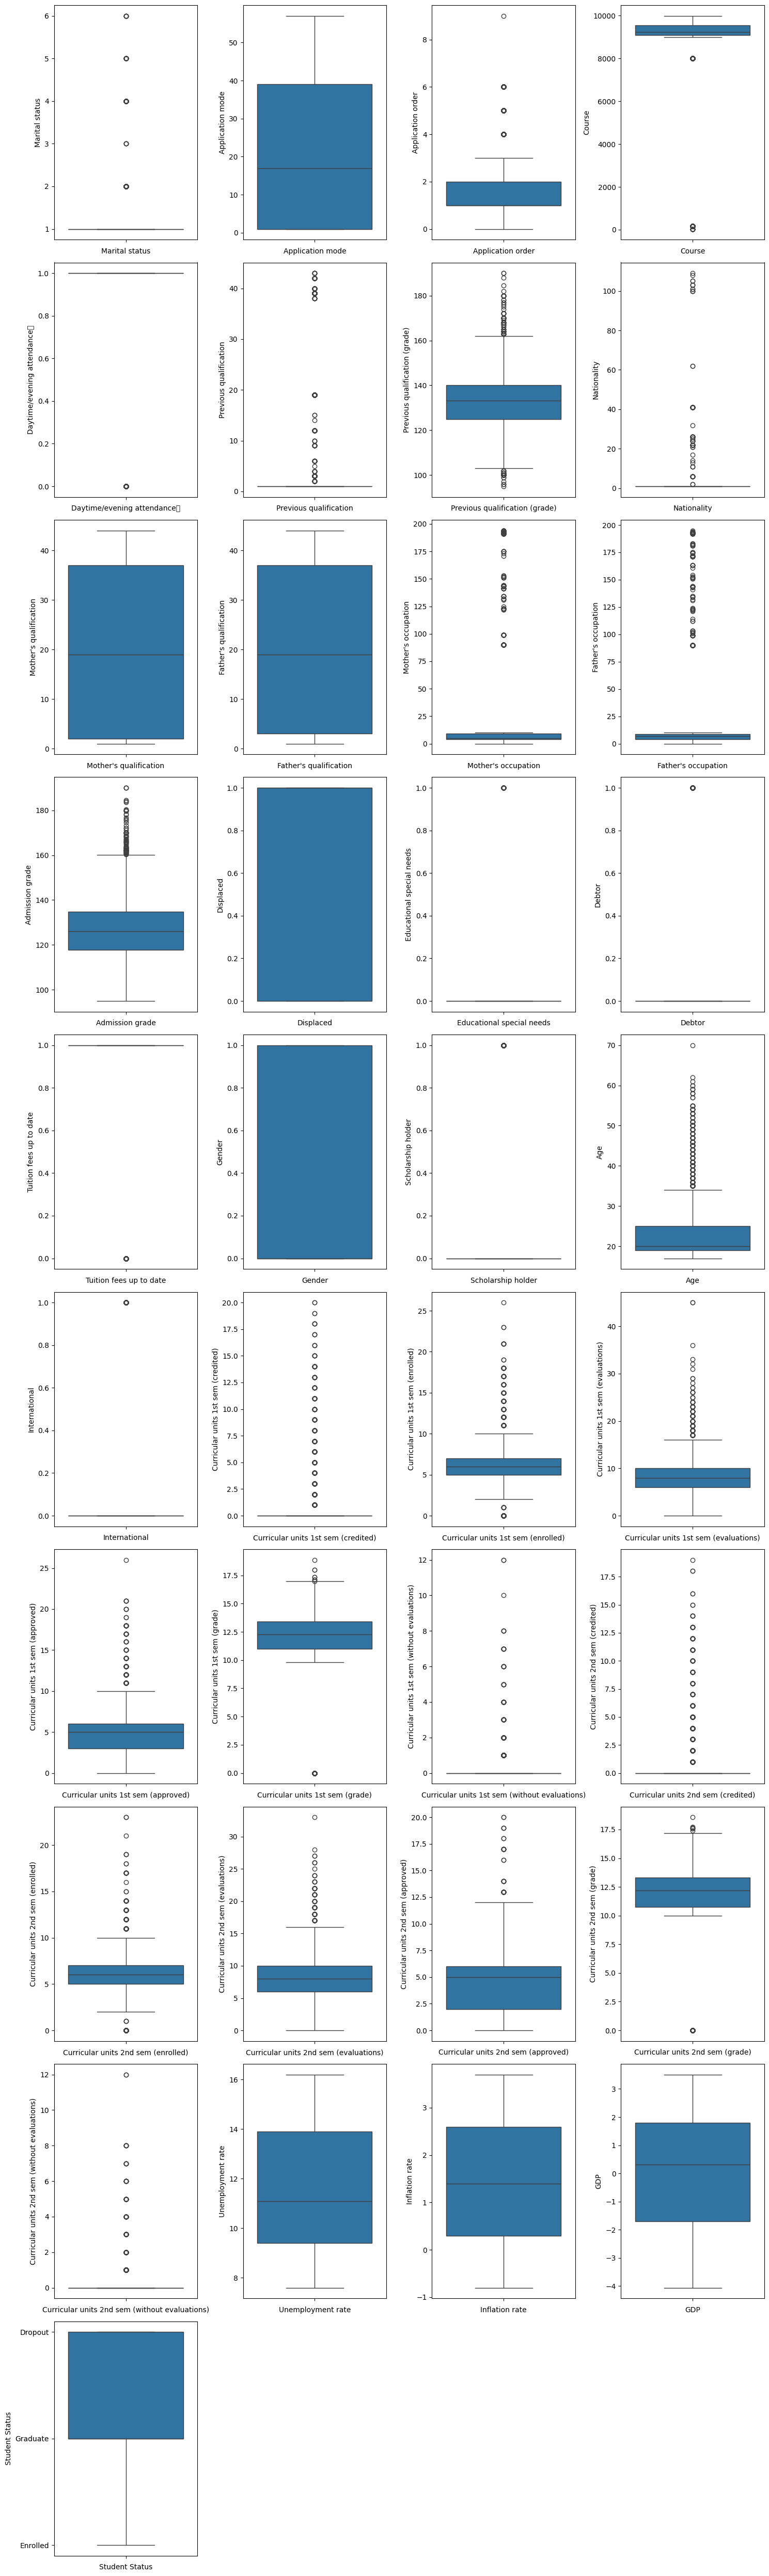

In [ ]:
# Menentukan jumlah kolom dalam new_df
num_cols = df.shape[1]

# Menentukan jumlah baris dan kolom untuk subplot
num_rows = (num_cols + 3) // 4  # +3 untuk memastikan kita memiliki cukup baris

# Membuat plot box untuk setiap fitur dalam new_df
plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(df.columns):
    plt.subplot(num_rows, 4, i+1)
    sns.boxplot(df[col])
    plt.xlabel(col)  # Menambahkan label sumbu x untuk setiap plot
plt.tight_layout()

# Tampilkan plot
plt.show()

#EDA

In [ ]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nationality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [ ]:
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nationality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

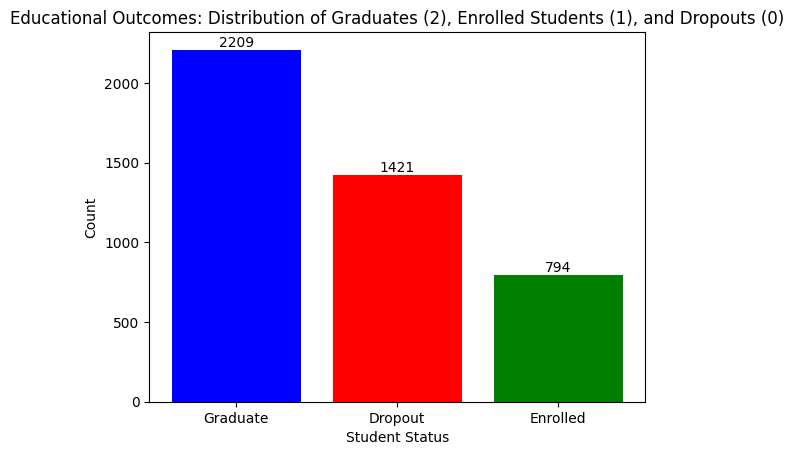

In [ ]:
# Menghitung jumlah masing-masing kategori di kolom 'Student Status'
categories_counts = df['Student Status'].value_counts()

# Membuat bar chart
plt.bar(categories_counts.index, categories_counts.values, color=['blue', 'red', 'green'])

# Menambahkan label dan judul
plt.xlabel('Student Status')
plt.ylabel('Count')
plt.title('Educational Outcomes: Distribution of Graduates (2), Enrolled Students (1), and Dropouts (0)')

# Menambahkan angka di atas bar
for i, count in enumerate(categories_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Menampilkan plot
plt.show()


In [ ]:
#Bar chart CU1 + CU2 (approved) dan Target. Untuk analisa berapa student drop, enrol,grad yang memiliki jumlah unit kurikulum yang lulus pada smt 1 & smt 2

In [ ]:
#Bar chart CU1 + CU2 (grades) dan Target. Untuk analisa berapa student drop, enrol,grad yang memiliki nilai atau angka rata-rata yg diperoleh pada smt 1 & smt 2

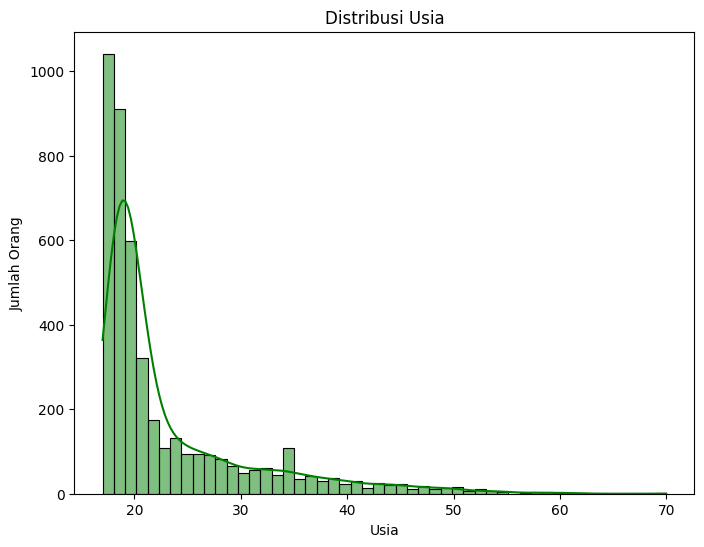

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['Age'], bins=50, color='g', kde=True)
ax.set_title('Distribusi Usia')
ax.set_xlabel('Usia')
ax.set_ylabel('Jumlah Orang')
plt.show()

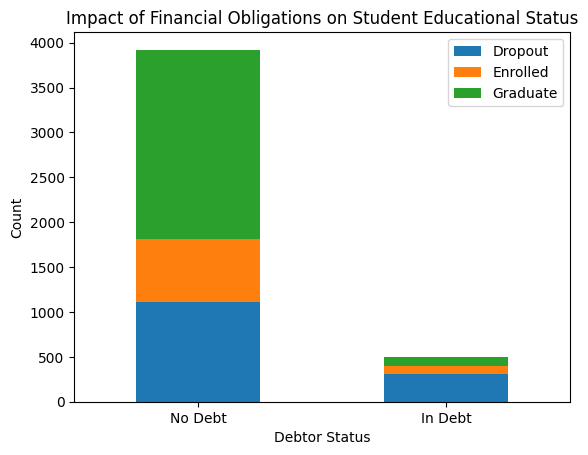

In [ ]:
#Financial status
# Mapping Student Status numerical labels to descriptive labels for the legend
student_status_labels = {0: 'Dropouts', 1: 'Enrolled', 2: 'Graduated'}

# Mapping numerical labels to descriptive labels for Debtor status
debtor_status_labels = {0: 'No Debt', 1: 'In Debt'}

# Visualizing the impact of student debt on educational status
grouped = df.groupby(['Debtor', 'Student Status']).size().unstack()
grouped.rename(index=debtor_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Debtor Status')
plt.ylabel('Count')
plt.title('Impact of Financial Obligations on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()


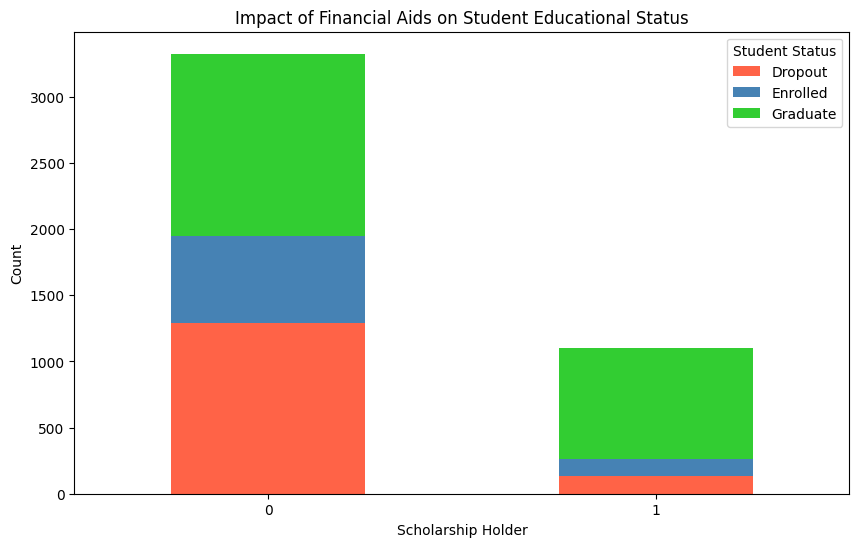

In [ ]:
# Definisikan student_status_labels
student_status_labels = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}

# Grouping data
grouped = df.groupby(['Scholarship holder', 'Student Status']).size().unstack(fill_value=0)

# Warna untuk setiap status siswa
colors = ['#FF6347', '#4682B4', '#32CD32']

# Membuat bar chart dengan warna yang ditentukan
ax = grouped.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Menambahkan label dan judul
plt.xlabel('Scholarship Holder')
plt.ylabel('Count')
plt.title('Impact of Financial Aids on Student Educational Status')

# Menggunakan student_status_labels untuk label legenda
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns], title='Student Status')
plt.xticks(rotation=0)
plt.show()


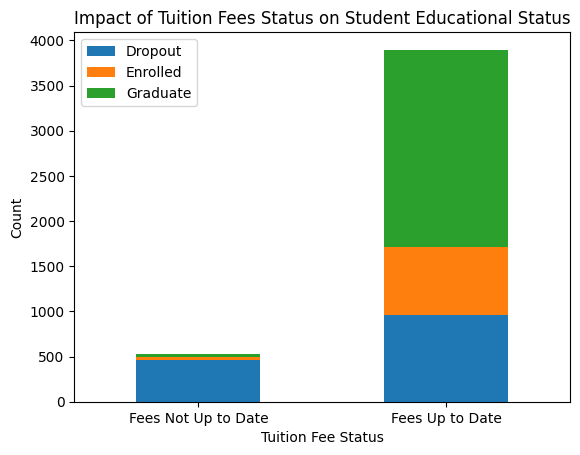

In [ ]:
# Mapping numerical labels to descriptive labels for Tuition Fee status
tuition_fee_status_labels = {0: 'Fees Not Up to Date', 1: 'Fees Up to Date'}

# Visualizing the impact of tuition fees status on educational outcomes
grouped = df.groupby(['Tuition fees up to date', 'Student Status']).size().unstack()
grouped.rename(index=tuition_fee_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Tuition Fee Status')
plt.ylabel('Count')
plt.title('Impact of Tuition Fees Status on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

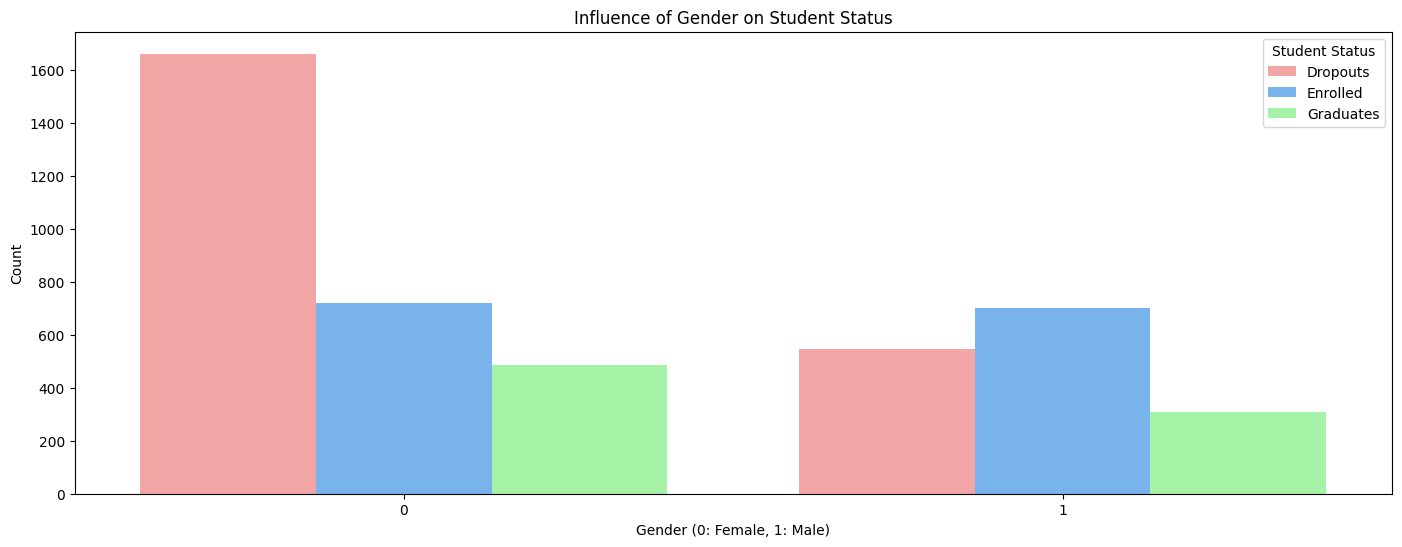

In [ ]:
# Mengubah ukuran plot
plt.figure(figsize=(17, 6))

# Membuat countplot dengan palet warna yang lebih jelas
sns.countplot(x='Gender', hue='Student Status', data=df, palette=['#ff9999','#66b3ff','#99ff99'])  # Tomato, SteelBlue, LimeGreen

# Menambahkan label dan judul
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Student Status', labels=['Dropouts', 'Enrolled', 'Graduates'])
plt.title('Influence of Gender on Student Status')

# Menampilkan plot
plt.show()

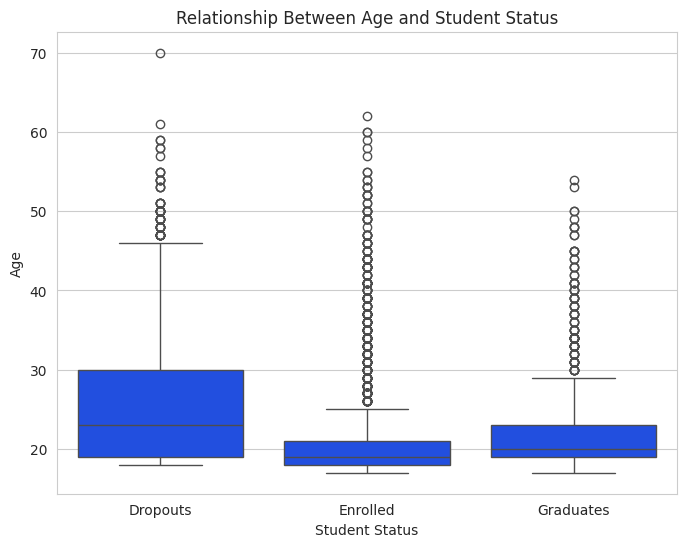

In [ ]:
# Mengatur gaya dan palet warna
sns.set_style("whitegrid")
sns.set_palette("bright")  # Menggunakan palet warna yang lebih terang

# Membuat plot dengan ukuran yang ditentukan
plt.figure(figsize=(8, 6))

# Menggambar box plot
sns.boxplot(x='Student Status', y='Age', data=df)

# Mengatur label sumbu x dan sumbu y
plt.xticks([0, 1, 2], ['Dropouts', 'Enrolled', 'Graduates'])
plt.xlabel('Student Status')
plt.ylabel('Age')

# Memberikan judul pada plot
plt.title('Relationship Between Age and Student Status')

# Menampilkan plot
plt.show()



#Feature Engineering

In [ ]:
df_cat = df.select_dtypes(include=['object'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df_cat:
  label_encoder.fit(df_cat[col])
  df[col] = label_encoder.transform(df_cat[col])

Penjelasan Label encoder target:
- 0 : dropout
- 1: Enrolled
- 2: Graduate

In [ ]:
##nyoba
df['average_grade'] = df[['Curricular units 1st sem (grade)',
                          'Curricular units 2nd sem (grade)']].mean(axis=1)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Student Status,average_grade
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,0.000000
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,13.833333
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,0.000000
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,12.914286
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,12.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,6,8,5,12.666667,0,15.5,2.8,-4.06,2,13.133333
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,6,2,11.000000,0,11.1,0.6,2.02,0,11.500000
4421,1,1,1,9500,1,1,154.0,1,37,37,...,8,9,1,13.500000,0,13.9,-0.3,0.79,0,14.206250
4422,1,1,1,9147,1,1,180.0,1,37,37,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,2,12.900000


##Split Data & Feature Scaling

In [ ]:
#Split Data
X = df.drop('Student Status', axis=1)
y = df['Student Status']

In [ ]:
#membagi dataset menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model Training

### Algoritma: XGBoost

In [ ]:
from xgboost import XGBClassifier

#initialize and train XGBoost model
xgb = xgb = XGBClassifier(use_label_encoder=True, eval_metric='logloss',
                          objective= 'multi:softmax', random_state = 42)
xgb.fit(X_train_scaled, y_train)

#make prediction and evaluate the model
xgb_pred = xgb.predict(X_test_scaled)
print("XGBoost Accuracy :",
      round(accuracy_score(y_test,xgb_pred)*100,2),"%")

XGBoost Accuracy : 79.21 %


###Algoritma: KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
knn_pred = knn.predict(X_test_scaled)
print("KNN Accuracy :",
      round(accuracy_score(y_test,knn_pred)*100,2),"%")

KNN Accuracy : 65.88 %


###Algoritma: Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
print("Random Forest Accuracy :",
      round(accuracy_score(y_test,rf_pred)*100,2),"%")

Random Forest Accuracy : 80.0 %


###Algoritma: Logistic Regression Multiclass

In [ ]:
lr = LogisticRegression(random_state=42, multi_class='multinomial',
                        max_iter=1000)

# Melatih model dan menghitung akurasi tanpa CV
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy: ",
      round(accuracy_score(y_test, lr_pred) * 100, 2), "%")

Logistic Regression Accuracy:  77.74 %


###Feature Selection

In [ ]:
correlation_matrix = df.corr()['Student Status']
correlation_matrix

Marital status                                   -0.089804
Application mode                                 -0.221747
Application order                                 0.089791
Course                                            0.034219
Daytime/evening attendance\t                      0.075107
Previous qualification                           -0.056039
Previous qualification (grade)                    0.103764
Nationality                                      -0.014801
Mother's qualification                           -0.043178
Father's qualification                           -0.001393
Mother's occupation                              -0.005629
Father's occupation                              -0.001899
Admission grade                                   0.120889
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.4098

In [ ]:
# Mendapatkan feature importance
feature_importances = rf.feature_importances_
feature_names = X_test_scaled


# Membuat DataFrame untuk visualisasi
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Mengurutkan berdasarkan pentingnya fitur
features = features.sort_values(by='Importance', ascending=False)
features

,Feature,Importance
30,Curricular units 2nd sem (approved),0.154153
31,Curricular units 2nd sem (grade),0.087834
24,Curricular units 1st sem (approved),0.070472
36,average_grade,0.070441
25,Curricular units 1st sem (grade),0.051243
12,Admission grade,0.039711
29,Curricular units 2nd sem (evaluations),0.036586
16,Tuition fees up to date,0.036469
19,Age,0.036308
6,Previous qualification (grade),0.036295


In [ ]:
df_scaled = df.drop(columns=["Nationality",
                                  "Mother's qualification",
                                  "Father's qualification",
                                  "Educational special needs",
                                  'International',
                                  "Curricular units 1st sem (without evaluations)",
                                  "Unemployment rate",
                                  "Inflation rate"], axis=1)

#Hyperparameter Tuning and Model Selection

##Hyperparameter Tunning

###XGBoost

In [ ]:
xgb_params = {
 'max_depth':np.random.randint(3, 7, 5),
 'min_child_weight':np.random.uniform(1, 10, 10),
 'learning_rate': np.random.uniform(0.01, 0.2, 10),
 'subsample': np.random.uniform(0.7, 1, 10),
}

xgb_grid = RandomizedSearchCV(estimator = xgb, param_distributions = xgb_params,
                              n_iter=50, scoring='accuracy', n_jobs=-1,
                              cv=5, random_state=42)

# Melatih model dengan data latihan
xgb_grid.fit(X_train_scaled, y_train)


# Mendapatkan skor terbaik dan parameter terbaik
best_score = xgb_grid.best_score_
best_params = xgb_grid.best_params_

# Mendapatkan model terbaik
xgb_best_model = xgb_grid.best_estimator_

# Menampilkan hasil
print("XGB Hyperparameter Tuning Results:")
print(f"Best Score: {best_score}")
print(f"Best Parameters: {best_params}")
print("Best Model:" )
print(xgb_best_model)

XGB Hyperparameter Tuning Results:
Best Score: 0.7730987142297765
Best Parameters: {'subsample': 0.907780578269572, 'min_child_weight': 2.0220723206534417, 'max_depth': 4, 'learning_rate': 0.17383042847217223}
Best Model:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.17383042847217223, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2.0220723206534417, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None,

In [ ]:
y_pred_xgb = xgb_best_model.predict(X_test_scaled)

# Menghitung akurasi pada data uji
xgb_test_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGB Test Accuracy:", xgb_test_accuracy)

XGB Test Accuracy: 0.7977401129943503


###Random Forest

In [ ]:
rf_params = {'bootstrap': [True, False],
 'max_depth': [5,8,10, 20],
 'max_features': [3, 4, 5, None],
 'min_samples_split': [2, 10, 12],
 'n_estimators': [100, 200, 300]}

rf_grid = RandomizedSearchCV(estimator = rf, param_distributions = rf_params,
                       n_iter=50, scoring='accuracy', cv = 5,
                       verbose=2, random_state = 2)

rf_grid.fit(X_train_scaled,y_train)

# Mendapatkan skor terbaik dan parameter terbaik
rf_best_score = rf_grid.best_score_
rf_best_params = rf_grid.best_params_

# Mendapatkan model terbaik
rf_best_model = rf_grid.best_estimator_

# Menampilkan hasil
print("RF Hyperparameter Tuning Results:")
print(f"Best Score: {rf_best_score}")
print(f"Best Parameters: {rf_best_params}")
print("Best Model:")
print(rf_best_model)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_split=12, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_split=12, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_split=12, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=5, max_features=5, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END bootstrap=False, max_depth=5, max_features=5, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END bootstrap=False, max_depth=5, max_features=5, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END bootstrap=False, max_dept

In [ ]:
y_pred_rf = rf_best_model.predict(X_test_scaled)

# Menghitung akurasi pada data uji
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)
print("RF Test Accuracy:", rf_test_accuracy)

RF Test Accuracy: 0.8101694915254237


###KNN

In [ ]:
# Mendefinisikan grid parameter untuk GridSearchCV
knn_params = {'n_neighbors': list(range(1,21)),
          'weights': ['uniform', 'distance'],
          'metric': ['minkowski', 'manhattan']}

# Membuat objek RandomSearchCv dengan parameter yang berbeda
knn_grid = RandomizedSearchCV(estimator=knn, param_distributions=knn_params,
                              n_iter=50, scoring='accuracy', cv = 5,
                              random_state = 42)

# Melatih model dengan data latihan
knn_grid.fit(X_train_scaled, y_train)

# Mendapatkan skor terbaik dan parameter terbaik
knn_best_score = knn_grid.best_score_
knn_best_params = knn_grid.best_params_

# Mendapatkan model terbaik
knn_best_model = knn_grid.best_estimator_

# Menampilkan hasil
print("knn hyperparameter Results:")
print(f"Best Score: {knn_best_score}")
print(f"Best Parameters: {knn_best_params}")
print("Best Model:")
print(knn_best_model)

knn hyperparameter Results:
Best Score: 0.7078316911594308
Best Parameters: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'manhattan'}
Best Model:
KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')


In [ ]:
y_pred_knn = knn_best_model.predict(X_test_scaled)

# Menghitung akurasi pada data uji
knn_test_accuracy = accuracy_score(y_test, y_pred_knn)
print("knn Test Accuracy:", knn_test_accuracy)

knn Test Accuracy: 0.735593220338983


###Logistic Regression

In [ ]:
lr_params = {
  'solver': ['sag', 'lbfgs', 'newton-cg'],
  'penalty': [None, 'l2'],
  'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

lr_grid = RandomizedSearchCV(lr, param_distributions = lr_params, cv=3,
                             n_iter=50, scoring='accuracy',
                             random_state = 42)
lr_grid.fit(X_train_scaled, y_train)

# Mendapatkan skor terbaik dan parameter terbaik
lr_best_score = lr_grid.best_score_
lr_best_params = lr_grid.best_params_

# Mendapatkan model terbaik
lr_best_model = lr_grid.best_estimator_

# Menampilkan hasil
print("LR Hyperparameter Tuning Results:")
print(f"Best Score: {lr_best_score}")
print(f"Best Parameters: {lr_best_params}")
print("Best Model:")
print(lr_best_model)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.p

LR Hyperparameter Tuning Results:
Best Score: 0.7629303776541452
Best Parameters: {'solver': 'sag', 'penalty': 'l2', 'C': 100}
Best Model:
LogisticRegression(C=100, max_iter=1000, multi_class='multinomial',
                   random_state=42, solver='sag')


In [ ]:
y_pred_lr = lr_best_model.predict(X_test_scaled)

# Menghitung akurasi pada data uji
lr_test_accuracy = accuracy_score(y_test, y_pred_lr)
print("LR Test Accuracy:", lr_test_accuracy)

LR Test Accuracy: 0.7807909604519774


#Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       284
           1       0.64      0.45      0.53       151
           2       0.84      0.95      0.89       450

    accuracy                           0.81       885
   macro avg       0.77      0.73      0.74       885
weighted avg       0.80      0.81      0.80       885



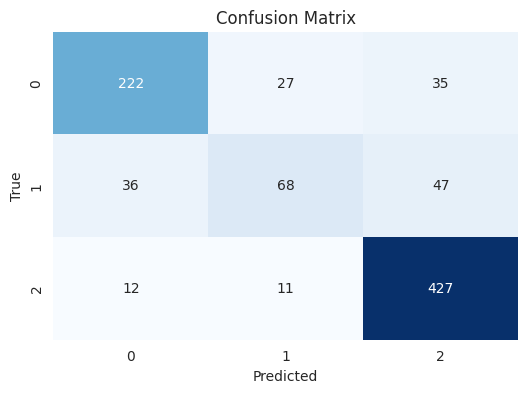

In [ ]:
# Evaluasi performa model
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)
print(f'Classification Report:\n{class_report}')

# Membuat matriks konfusi menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()